In [3]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import matplotlib.dates as mdates
from pandas import Timestamp
from time import time
import scipy.io
from matplotlib import gridspec

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

## Managing Modules
from importlib.util import find_spec
if find_spec("utils") is None:
    import sys
    sys.path.append('..')

# custom lib
import helper_functions as hf
# Usefull when importing modules in notebooks
from utils import mean_absolute_percentage_error, extract_from_date, annotate_percentage, annotate_total
from utils import column_names, colors, moving_average, plotMovingAverage, remove_chart_borders
from utils import exponential_smoothing, plotExponentialSmoothing, moving_average, plotMovingAverage
from utils import line_plot_annotate, cross_correlation, plot_ccross

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
pd.options.mode.chained_assignment = None  # default='warn'
sns.set(style='whitegrid', palette='deep', font_scale=1.2)
pd.set_option('max_columns',40, 'precision',4)

In [5]:
from utils import load_powers
from rssi import arange_RSSI_serie, create_RSSI_dataframe
#del(df)

path_of_file= '../../Modules_Powers_2.csv'
df_powers = load_powers(path_of_file)
df_powers.head()

,Timestamp,Module,Type,Receiver,Tx1,P_Tx1(dbm),Tx2,P_Tx2(dbm),Tx3,P_Tx3(dbm),Tx4,P_Tx4(dbm),Tx5,P_Tx5(dbm),Tx6,P_Tx6(dbm),Tx7,P_Tx7(dbm)
0,2017-10-01 00:00:05,00.57.FE.04,Net-Coordinator,0x0057FE04,0x0057FE09,-72.0,0x0057FE01,-75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-01 00:00:42,00.57.FE.04,Net-Coordinator,0x0057FE04,0x0057FE09,-72.0,0x0057FE01,-75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-10-01 00:01:13,00.57.FE.04,Net-Coordinator,0x0057FE04,0x0057FE09,-72.0,0x0057FE01,-75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-10-01 00:01:42,00.57.FE.04,Net-Coordinator,0x0057FE04,0x0057FE09,-72.0,0x0057FE01,-75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-10-01 00:02:05,00.57.FE.04,Net-Coordinator,0x0057FE04,0x0057FE09,-72.0,0x0057FE01,-75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Radios= np.array(['00.57.FE.04', '00.57.FE.0E', '00.57.FE.0F', '00.57.FE.06', '00.57.FE.09', '00.57.FE.01', '00.57.FE.03','00.57.FE.05'])
Receivers= np.array(['0x0057FE04', '0x0057FE0E', '0x0057FE0F', '0x0057FE06', '0x0057FE09','0x0057FE01', '0x0057FE03', '0x0057FE05'])

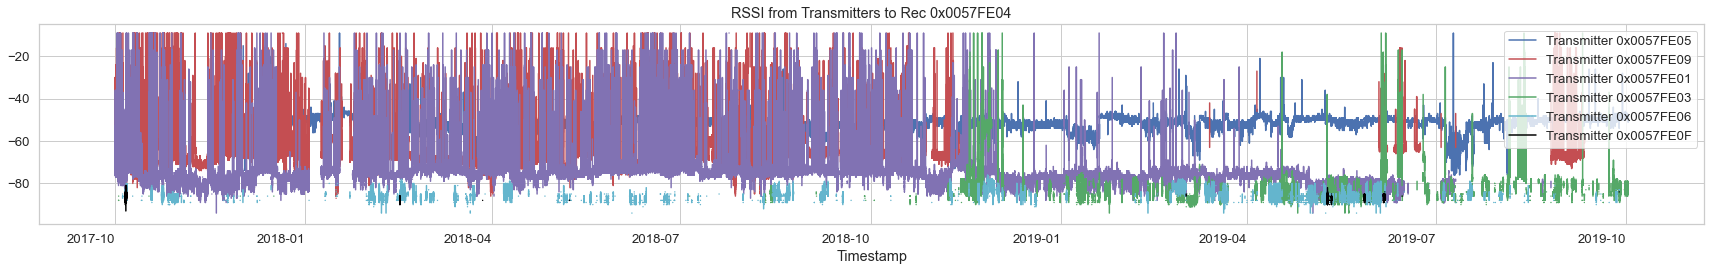

In [7]:
df_powers.set_index('Timestamp', drop=True, inplace=True)
start_date = '2017-10-01'
end_date='2019-10-01'
# This is for a single receiver and if it's needed to divide it into transmitters
# if plot_entire=True then plots the entire neighbour, as before, to show the problem stated above.
subset, serie, transmitters, Tx = arange_RSSI_serie(df_powers, receiver=0, start_date=start_date, end_date=end_date, joint=True, sharex=True, plot_entire=False)
dff = create_RSSI_dataframe(df_powers, Radios, Receivers, plot=False, start_date=start_date, end_date=end_date, raw=True, resample_time=None)
#plt.figure(figsize=(24,5));sns.lineplot(data=dff[dff['Receiver']=='00.57.FE.03'].dropna(axis=1, how='all').drop('Receiver',axis=1))

In [8]:
dff = extract_from_date(dff.reset_index(), 'Timestamp', suffix = 't')  
dff = dff.set_index('Timestamp', drop=True)

In [9]:
del(df_powers)
dff

,0x0057FE05,0x0057FE09,0x0057FE01,0x0057FE03,0x0057FE06,0x0057FE0F,Receiver,0x0057FE04,0x0057FE0E,t_year,t_month,t_month_name,t_year_month,t_date,t_week,t_day,t_dayofweek,t_day_name,t_hour,t_day_time,t_weekend
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-10-01 00:00:05,NaN,-72.0,-75.0,NaN,NaN,NaN,00.57.FE.04,NaN,NaN,2017,10,October,201710,20171001,39,1,6,Sunday,0,NaN,1
2017-10-01 00:00:42,NaN,-72.0,-75.0,NaN,NaN,NaN,00.57.FE.04,NaN,NaN,2017,10,October,201710,20171001,39,1,6,Sunday,0,NaN,1
2017-10-01 00:01:13,NaN,-72.0,-75.0,NaN,NaN,NaN,00.57.FE.04,NaN,NaN,2017,10,October,201710,20171001,39,1,6,Sunday,0,NaN,1
2017-10-01 00:01:42,NaN,-72.0,-75.0,NaN,NaN,NaN,00.57.FE.04,NaN,NaN,2017,10,October,201710,20171001,39,1,6,Sunday,0,NaN,1
2017-10-01 00:02:05,NaN,-72.0,-75.0,NaN,NaN,NaN,00.57.FE.04,NaN,NaN,2017,10,October,201710,20171001,39,1,6,Sunday,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01 23:49:59,NaN,NaN,NaN,-77.0,-68.0,-77.0,00.57.FE.05,-59.0,NaN,2019,10,October,201910,20191001,40,1,1,Tuesday,23,night,0
2019-10-01 23:52:05,NaN,NaN,NaN,-77.0,-68.0,-76.0,00.57.FE.05,-59.0,NaN,2019,10,October,201910,20191001,40,1,1,Tuesday,23,night,0
2019-10-01 23:54:11,NaN,NaN,NaN,-77.0,-67.0,-77.0,00.57.FE.05,-59.0,NaN,2019,10,October,201910,20191001,40,1,1,Tuesday,23,night,0


In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from utils import isolation_forest, plot_anomaly

In [11]:
from utils import create_labels, create_segments_and_labels
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from labels import radio_05_from_0F
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.svm import SVC

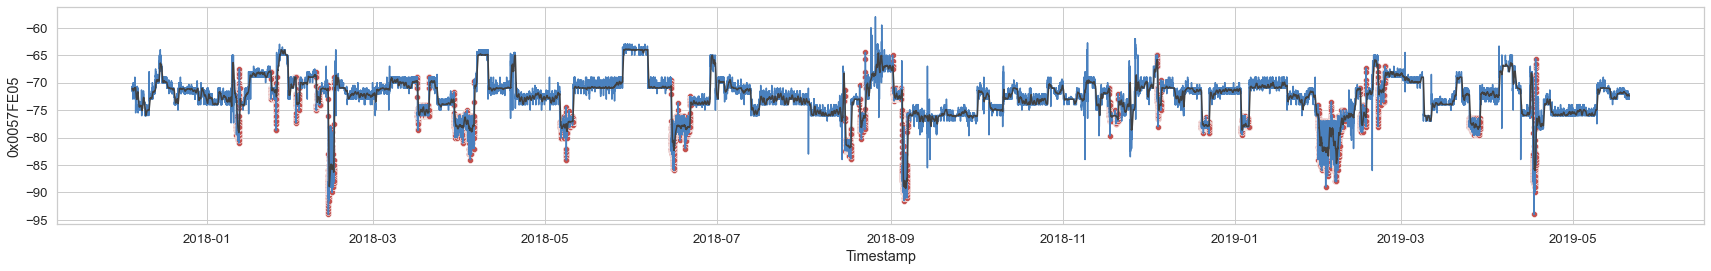

In [12]:
transmitter = '0x0057FE05'
init_date='2017-12-05'
end_date='2019-05-20'
resample = '5Min'
data = dff[dff['Receiver'] == '00.57.FE.0F'][['0x0057FE05']][init_date:end_date].resample(resample).mean().interpolate()
data = data.drop(data.loc[data['0x0057FE05'] > -15].index, axis=0)
# insert some anomalies defined already in labels.py
data["2018-05-06 06:20:00":"2018-05-10 22:20:00"]['0x0057FE05'] = data["2018-05-06 06:20:00":"2018-05-10 22:20:00"]['0x0057FE05'] -6.1  
data["2018-08-15 04:05:00":"2018-08-17 17:05:00"]['0x0057FE05'] = data["2018-08-15 04:05:00":"2018-08-17 17:05:00"]['0x0057FE05'] -5.4
data['2018-12-20 02:10:00':'2018-12-22 20:20:00']['0x0057FE05'] = data['2018-12-20 02:10:00':'2018-12-22 20:20:00']['0x0057FE05'] -6.2 
data['2019-03-25 05:15:00':'2019-03-28 23:10:00']['0x0057FE05'] = data['2019-03-25 05:15:00':'2019-03-28 23:10:00']['0x0057FE05'] -5.5  
data['2019-01-03 01:30:00':'2019-01-05 22:40:00']['0x0057FE05'] = data['2019-01-03 01:30:00':'2019-01-05 22:40:00']['0x0057FE05'] -7

data['Label'] = 'N'
for ii in np.arange(0,len(radio_05_from_0F),2):
    data.loc[radio_05_from_0F[ii] : radio_05_from_0F[ii+1]]['Label'] = 'SDR'

anomalies_df = data[data['Label'] =='SDR']
data['rolling_mean'] = data[transmitter].rolling(window=120).mean().interpolate()

data = data.dropna()
fig, ax1 = plt.subplots(1,1,figsize=(24,4))
sns.lineplot(data = data, x = data.index, y=data[transmitter], ax=ax1, color=colors['BLUE2'])
sns.lineplot(data = data, x = data.index, y=data['rolling_mean'], ax=ax1, color=colors['GRAY2'])
sns.scatterplot(data = anomalies_df, x = anomalies_df.index, y=anomalies_df[transmitter], ax=ax1, color=colors['RED1'])
plt.tight_layout()

### Preparing dataset for Classification

In [96]:
LABELS = ["N", 'SDR']

In [13]:
# Define column name of the label vector
# Transform the labels from String to Integer via LabelEncoder
# Add a new column to the existing DataFrame with the encoded values
LABEL = 'RSSIEncoded'
le = preprocessing.LabelEncoder()
data[LABEL] = le.fit_transform(data['Label'].values.ravel())
data[transmitter] = data[transmitter] / -data[transmitter].mean()
data['rolling_mean'] = data['rolling_mean'] / -data['rolling_mean'].mean()
data = data.round(3)

In [14]:
# separate in train and test
train_data = data.loc[:'2019-01-10']
test_data = data.loc['2019-01-11':]

TIME_PERIODS = 60
STEP_DISTANCE = 30
N_FEATURES = 2

In [16]:
features = ['0x0057FE05', 'rolling_mean']
x_train, y_train = create_segments_and_labels(train_data, TIME_PERIODS, STEP_DISTANCE, LABEL, features)
x_test, y_test = create_segments_and_labels(test_data, TIME_PERIODS, STEP_DISTANCE, LABEL, features)

In [17]:
print('X train shape {}'.format(x_train.shape))
print('Labels format training set {}'.format(y_train.shape))
print('X test shape {}'.format(x_test.shape))
print('Labels format testing set {}\n'.format(y_test.shape))

X train shape (3854, 60, 2)
Labels format training set (3854,)
X test shape (1246, 60, 2)
Labels format testing set (1246,)



In [18]:
input_width = x_train.shape[1]     # number of periods
num_channels = x_train.shape[2]    # number of sensors
num_classes = le.classes_.size     # labels

x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

n_samples = x_train.shape[0]
n_timesteps = x_train.shape[1]
n_features = x_train.shape[2]

y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_hot = tf.keras.utils.to_categorical(y_test, num_classes)

In [49]:
input_shape = (n_timesteps, n_features)

filters = 64
kernel_size = 3
dropout = 0.5

In [50]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

BATCH_SIZE = 128
EPOCHS = 60

history = model.fit(x=x_train, y=y_train_hot, batch_size=BATCH_SIZE,
                    epochs=EPOCHS, validation_split=0.2, verbose=2)

history_df = pd.DataFrame(history.history)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 58, 64)            448       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 56, 64)            12352     
_________________________________________________________________
dropout_8 (Dropout)          (None, 56, 64)            0         
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 28, 64)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               179300    
_________________________________________________________________
dense_17 (Dense)             (None, 2)                

In [51]:
print('\nCLASSIFICATION REPORT ON TRAINING DATA-------------------------\n')
predictions = model.predict_classes(x_test)
print(model.evaluate(x_test, y_test_hot, verbose=1))
print(classification_report(y_test, predictions))


CLASSIFICATION REPORT ON TRAINING DATA-------------------------

39/39 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.9326
[0.2593872845172882, 0.932584285736084]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1056
         1.0       0.79      0.76      0.78       190

    accuracy                           0.93      1246
   macro avg       0.87      0.86      0.87      1246
weighted avg       0.93      0.93      0.93      1246



### **Other hyperparameters**

An important hyperparameter for the CNN is the number of filter maps. We can experiment with a range of different values, from less to many more than the 64 used in the first model that we developed.

### Changing the number of filters

In [68]:
n_params = [16, 32, 64, 128, 256]
n_outputs=2
loss = tf.keras.losses.categorical_crossentropy
EPOCHS = 60

In [74]:
scores = list()
history_df_list = list()
model_list = list()
for ii in range(len(n_params)):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv1D(filters=n_params[ii], kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Conv1D(filters=n_params[ii], kernel_size=kernel_size, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs,activation='softmax'))
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    history = model.fit(x=x_train, y=y_train_hot, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.3, verbose=2)
    history_df_list.append(pd.DataFrame(history.history))
    model_list.append(model)
    score = model.evaluate(x_test, y_test_hot, batch_size=BATCH_SIZE, verbose=1)
    scores.append(score[1])
    print('Accuracy of {}% with {} filters'.format(np.round(score[1]*100,2), n_params[ii]))
    predictions = model.predict_classes(x_test)
    print(classification_report(y_test, predictions))

Epoch 1/60
22/22 - 1s - loss: 0.5168 - accuracy: 0.7768 - val_loss: 0.4027 - val_accuracy: 0.9127
Epoch 2/60
22/22 - 0s - loss: 0.4453 - accuracy: 0.8498 - val_loss: 0.3778 - val_accuracy: 0.9127
Epoch 3/60
22/22 - 0s - loss: 0.4432 - accuracy: 0.8498 - val_loss: 0.3675 - val_accuracy: 0.9127
Epoch 4/60
22/22 - 0s - loss: 0.4410 - accuracy: 0.8498 - val_loss: 0.3818 - val_accuracy: 0.9127
Epoch 5/60
22/22 - 0s - loss: 0.4393 - accuracy: 0.8498 - val_loss: 0.3694 - val_accuracy: 0.9127
Epoch 6/60
22/22 - 0s - loss: 0.4395 - accuracy: 0.8498 - val_loss: 0.3535 - val_accuracy: 0.9127
Epoch 7/60
22/22 - 0s - loss: 0.4421 - accuracy: 0.8498 - val_loss: 0.3808 - val_accuracy: 0.9127
Epoch 8/60
22/22 - 0s - loss: 0.4388 - accuracy: 0.8498 - val_loss: 0.3577 - val_accuracy: 0.9127
Epoch 9/60
22/22 - 0s - loss: 0.4359 - accuracy: 0.8498 - val_loss: 0.3532 - val_accuracy: 0.9127
Epoch 10/60
22/22 - 0s - loss: 0.4324 - accuracy: 0.8498 - val_loss: 0.3733 - val_accuracy: 0.9127
Epoch 11/60
22/22 -

c:\users\carlos\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/60
22/22 - 1s - loss: 0.4598 - accuracy: 0.8472 - val_loss: 0.3651 - val_accuracy: 0.9127
Epoch 2/60
22/22 - 0s - loss: 0.4442 - accuracy: 0.8498 - val_loss: 0.3866 - val_accuracy: 0.9127
Epoch 3/60
22/22 - 0s - loss: 0.4385 - accuracy: 0.8498 - val_loss: 0.4351 - val_accuracy: 0.9127
Epoch 4/60
22/22 - 0s - loss: 0.4466 - accuracy: 0.8498 - val_loss: 0.4022 - val_accuracy: 0.9127
Epoch 5/60
22/22 - 0s - loss: 0.4391 - accuracy: 0.8498 - val_loss: 0.3610 - val_accuracy: 0.9127
Epoch 6/60
22/22 - 0s - loss: 0.4370 - accuracy: 0.8498 - val_loss: 0.3586 - val_accuracy: 0.9127
Epoch 7/60
22/22 - 0s - loss: 0.4445 - accuracy: 0.8498 - val_loss: 0.3306 - val_accuracy: 0.9127
Epoch 8/60
22/22 - 0s - loss: 0.4336 - accuracy: 0.8498 - val_loss: 0.3730 - val_accuracy: 0.9127
Epoch 9/60
22/22 - 0s - loss: 0.4296 - accuracy: 0.8498 - val_loss: 0.3446 - val_accuracy: 0.9127
Epoch 10/60
22/22 - 0s - loss: 0.4345 - accuracy: 0.8498 - val_loss: 0.3521 - val_accuracy: 0.9127
Epoch 11/60
22/22 -

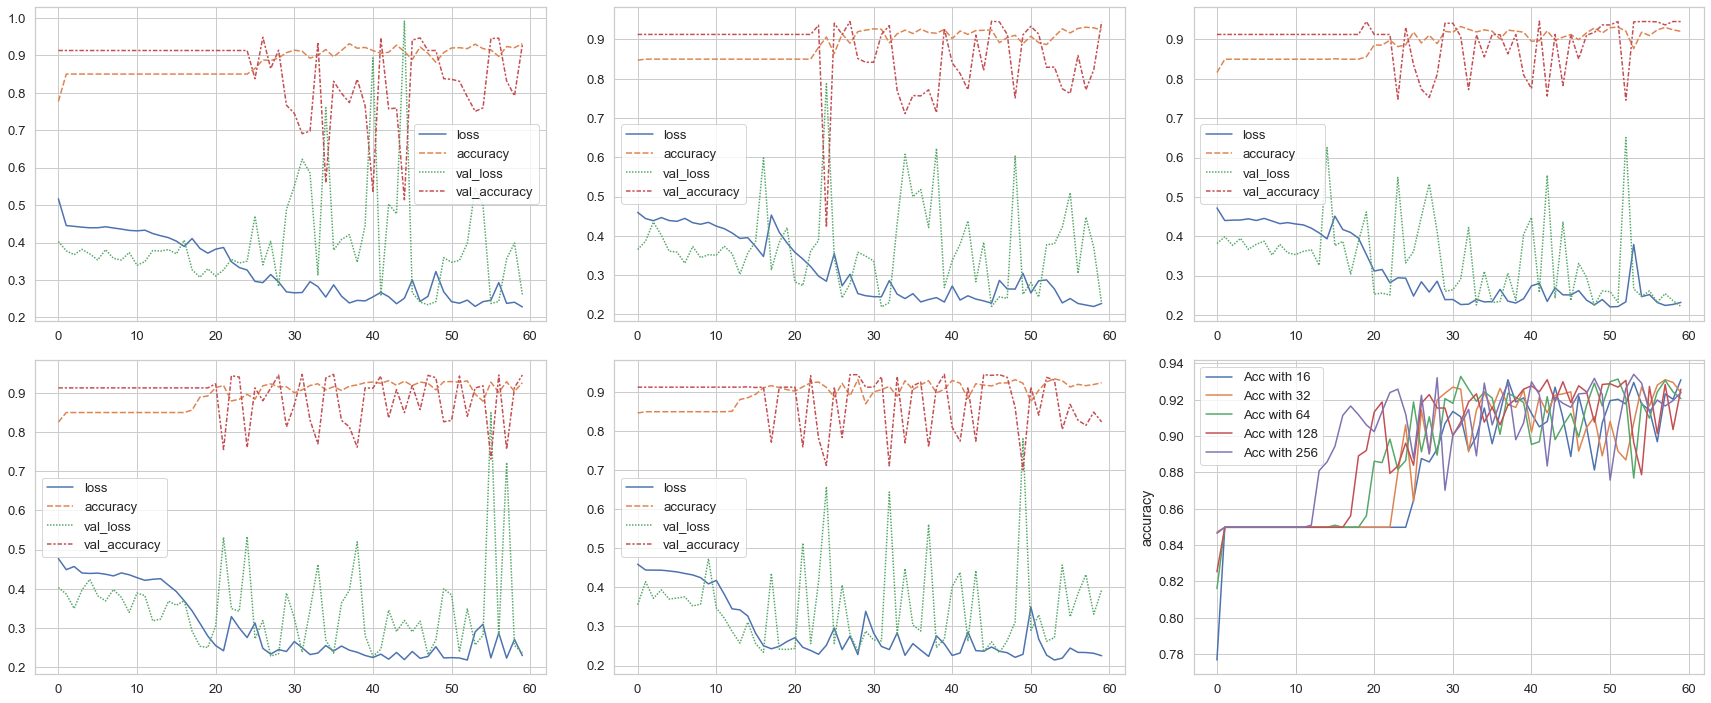

In [75]:
fig, axarr = plt.subplots(nrows=2, ncols=3, figsize =(24,10))
sns.lineplot(data=history_df_list[0], ax=axarr[0,0])
sns.lineplot(data=history_df_list[1], ax=axarr[0,1])
sns.lineplot(data=history_df_list[2], ax=axarr[0,2])
sns.lineplot(data=history_df_list[3], ax=axarr[1,0])
sns.lineplot(data=history_df_list[4], ax=axarr[1,1])
sns.lineplot(data=history_df_list[0]['accuracy'], ax=axarr[1,2])
sns.lineplot(data=history_df_list[1]['accuracy'], ax=axarr[1,2])
sns.lineplot(data=history_df_list[2]['accuracy'], ax=axarr[1,2])
sns.lineplot(data=history_df_list[3]['accuracy'], ax=axarr[1,2])
sns.lineplot(data=history_df_list[4]['accuracy'], ax=axarr[1,2])
axarr[1,2].legend(['Acc with 16','Acc with 32','Acc with 64','Acc with 128','Acc with 256'])
plt.tight_layout()
plt.show()

### Changing size of Kernel
The size of the kernel is another important hyperparameter of the 1D CNN to tune. The kernel size controls the number of time steps consider in each “read” of the input sequence, that is then projected onto the feature map (via the convolutional process).

A large kernel size means a less rigorous reading of the data, but may result in a more generalized snapshot of the input.

In [76]:
n_kernels=[2, 3, 5, 7, 11]
n_filters = 64

In [78]:
scores = list()
history_df_list = list()
model_list = list()
for ii in range(len(n_kernels)):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv1D(filters=n_filters, kernel_size=n_kernels[ii], activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Conv1D(filters=n_filters, kernel_size=n_kernels[ii], activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs,activation='softmax'))
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    history = model.fit(x=x_train, y=y_train_hot, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.3, verbose=False)
    history_df_list.append(pd.DataFrame(history.history))
    model_list.append(model)
    score = model.evaluate(x_test, y_test_hot,batch_size=BATCH_SIZE, verbose=1)
    scores.append(score[1])
    print('Accuracy of {}% with {} kernels'.format(np.round(score[1]*100,2), n_kernels[ii]))

10/10 [==============================] - 0s 6ms/step - loss: 0.2516 - accuracy: 0.9069
Accuracy of 90.69% with 2 kernels
10/10 [==============================] - 0s 7ms/step - loss: 0.2412 - accuracy: 0.9286
Accuracy of 92.86% with 3 kernels
10/10 [==============================] - 0s 6ms/step - loss: 0.2631 - accuracy: 0.9326
Accuracy of 93.26% with 5 kernels
10/10 [==============================] - 0s 6ms/step - loss: 0.3989 - accuracy: 0.7881
Accuracy of 78.81% with 7 kernels
10/10 [==============================] - 0s 7ms/step - loss: 0.5764 - accuracy: 0.6814
Accuracy of 68.14% with 11 kernels


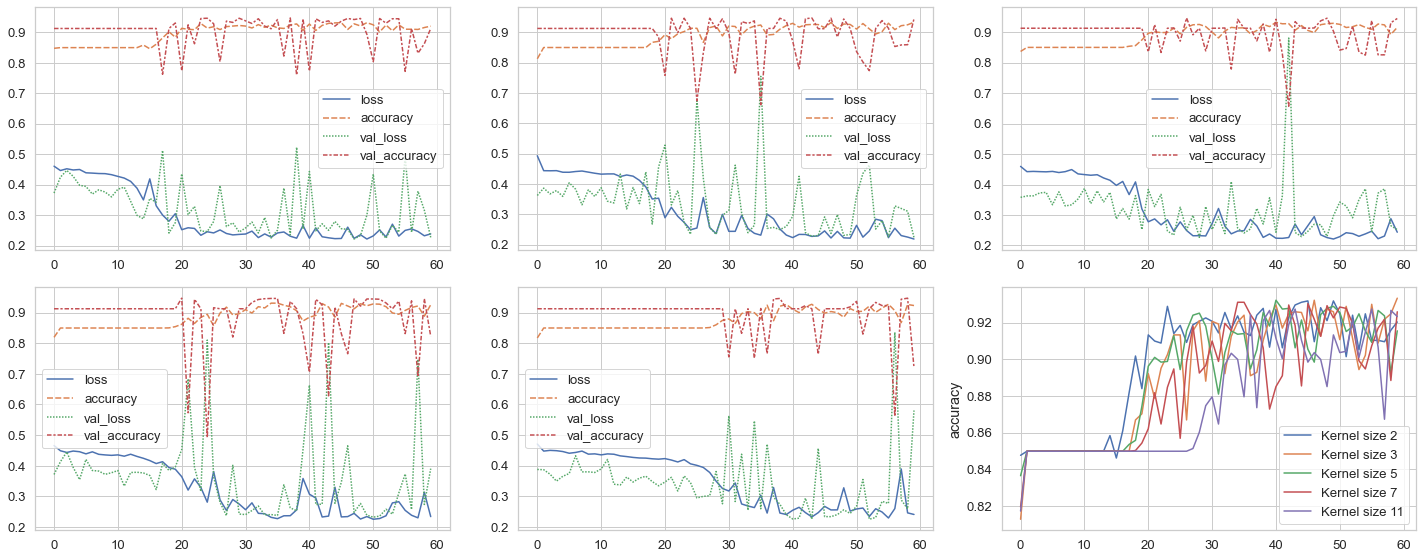

In [79]:
fig, axarr = plt.subplots(nrows=2, ncols=3, figsize =(20,8))
sns.lineplot(data=history_df_list[0], ax=axarr[0,0])
sns.lineplot(data=history_df_list[1], ax=axarr[0,1])
sns.lineplot(data=history_df_list[2], ax=axarr[0,2])
sns.lineplot(data=history_df_list[3], ax=axarr[1,0])
sns.lineplot(data=history_df_list[4], ax=axarr[1,1])
sns.lineplot(data=history_df_list[0]['accuracy'], ax=axarr[1,2])
sns.lineplot(data=history_df_list[1]['accuracy'], ax=axarr[1,2])
sns.lineplot(data=history_df_list[2]['accuracy'], ax=axarr[1,2])
sns.lineplot(data=history_df_list[3]['accuracy'], ax=axarr[1,2])
sns.lineplot(data=history_df_list[4]['accuracy'], ax=axarr[1,2])
axarr[1,2].legend(['Kernel size 2','Kernel size 3','Kernel size 5','Kernel size 7','Kernel size 11'])
plt.tight_layout()
plt.show()

### Using Wavelets

In [238]:
import pywt
from scipy.fftpack import fft
from scipy import signal
from collections import Counter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
from scipy.signal import welch
import scaleogram as scg
from skimage.transform import resize

from utils import plot_wavelet, wavelet_transform
from matplotlib.colors import ListedColormap

cmaps = ['twilight_shifted', 'coolwarm', 'seismic']

wavelet_families = pywt.families(short=False)
discrete_mother_wavelets = pywt.wavelist(kind='discrete')
continuous_mother_wavelets = pywt.wavelist(kind='continuous')
print("PyWavelets contains the following Continuous families: ")
print(continuous_mother_wavelets,'\n')

PyWavelets contains the following Continuous families: 
['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan'] 



#### Plot the Scaleogram using the Continuous Wavelet Transform
pywt.cwt(data, scales, wavelet) One dimensional Continuous Wavelet Transform.

We must define a convenient mother wavelet and scale size for the continuous wavelet function pywt.cwt. Regarding this kind of signal (Figure 5), we choose the Morlet Mother Wavelet (Figure 2) based on its most suitable shape. To select an appropriate range of scales, let’s consider the CWT coefficients of three different ranges 32, 64 and 128, represented as a scalogram

In general, a smaller size of scales (in our example 32) enables more focus of abrupt changes. As already mentioned, these suddenly changes are often the most important characteristics. Otherwise a wide range of scales (in our example, 64 or 128) provides more information (about slowly changes), which can provide a better classification accuracy. However, you will need a deeper CNN for the second option.

It is manually feasible to differ between the different activities through the visualization of the CWT coefficients via a scalogram.

#### Separate data again

In [260]:
# separate in train and test
train_data = data.loc[:'2019-01-10']
test_data = data.loc['2019-01-11':]

TIME_PERIODS = 124
STEP_DISTANCE = 30
N_FEATURES = 2

In [261]:
features = ['0x0057FE05', 'rolling_mean']
x_train, y_train = create_segments_and_labels(train_data, TIME_PERIODS, STEP_DISTANCE, LABEL, features)
x_test, y_test = create_segments_and_labels(test_data, TIME_PERIODS, STEP_DISTANCE, LABEL, features)

In [262]:
print('X train shape {}'.format(x_train.shape))
print('Labels format training set {}'.format(y_train.shape))
print('X test shape {}'.format(x_test.shape))
print('Labels format testing set {}\n'.format(y_test.shape))

X train shape (3852, 124, 2)
Labels format training set (3852,)
X test shape (1244, 124, 2)
Labels format testing set (1244,)



In [263]:
input_width = x_train.shape[1]     # number of periods
num_channels = x_train.shape[2]    # number of sensors
num_classes = le.classes_.size     # labels

x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

n_samples = x_train.shape[0]
n_timesteps = x_train.shape[1]
n_features = x_train.shape[2]

y_train_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_hot = tf.keras.utils.to_categorical(y_test, num_classes)

#### CWT

In [264]:
def split_indices_per_label(y):
    indicies_per_label = [[] for x in range(0,len(LABELS))]
    # loop over the six labels
    for i in range(len(LABELS)): 
        indicies_per_label[i] = np.where(y == i)[0]
    return indicies_per_label

In [265]:
# list of list of sample indicies per activity
train_labels_indicies = split_indices_per_label(y_train)

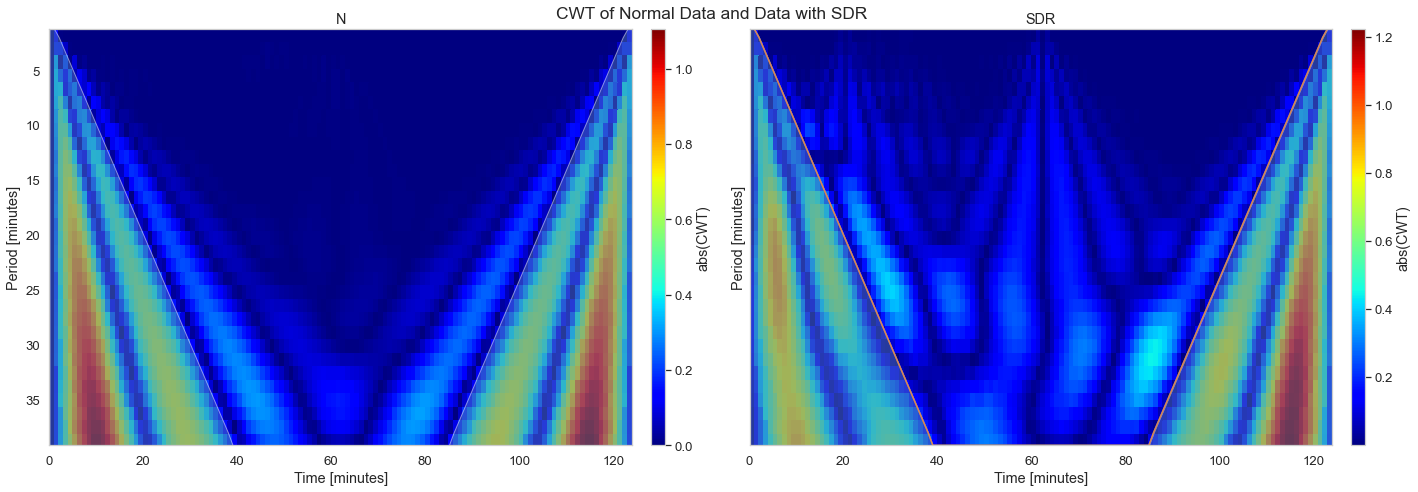

In [318]:
time = np.arange(TIME_PERIODS)
sample_index = 64
signal_index = 0
#wavelet='cmor3-1.5'
wavelet='morl'

scales=np.arange(1, 32)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(20,7))
fig.suptitle('CWT of Normal Data and Data with SDR')
for ax, indices, name in zip(axs.flat, train_labels_indicies, LABELS):
    ax = scg.cws(time, x_train[indices[sample_index],:, signal_index], scales=scales, wavelet=wavelet,
          ax=ax, cmap="jet", ylabel="Period [minutes]", xlabel="Time [minutes]",
          title=name, coikw={'alpha':0.5})
plt.tight_layout()

In [319]:
# amount of pixels in X and Y 
rescale_size = 64
# determine the max scale size, this is for adjust the images
# (to n_scales X n_pixels)
n_scales = 32

In [320]:
def create_cwt_images(x_train, n_scales=32, rescale_size=64, wavelet='morl'):
    n_samples = x_train.shape[0] 
    n_features = x_train.shape[2] 
    # range of scales from 1 to n_scales
    scales = np.arange(1, n_scales + 1) 
    # pre allocate array
    X_cwt = np.ndarray(shape=(n_samples, rescale_size, rescale_size, n_features), dtype = 'float32')

    for sample in range(n_samples):
        if sample % 1000 == 0:
            print('Sample number {}'.format(sample))
        for feature in range(n_features):
            serie = x_train[sample, :, feature]
            # continuous wavelet transform 
            coeffs, freqs = pywt.cwt(serie, scales, wavelet)
            # resize the 2D cwt coeffs
            rescale_coeffs = resize(coeffs, (rescale_size, rescale_size), mode = 'constant')
            X_cwt[sample,:,:,feature] = rescale_coeffs
    return X_cwt

In [321]:
X_train_cwt = create_cwt_images(x_train, n_scales, rescale_size)
print(f"shapes (n_samples, x_img, y_img, z_img) of X_train_cwt: {X_train_cwt.shape}")
X_test_cwt = create_cwt_images(x_test, n_scales, rescale_size)
print(f"shapes (n_samples, x_img, y_img, z_img) of X_test_cwt: {X_test_cwt.shape}")

Sample number 0
Sample number 1000
Sample number 2000
Sample number 3000
shapes (n_samples, x_img, y_img, z_img) of X_train_cwt: (3852, 64, 64, 2)
Sample number 0
Sample number 1000
shapes (n_samples, x_img, y_img, z_img) of X_test_cwt: (1244, 64, 64, 2)


### Training the Convolutional Neural Network with the CWT

In [322]:
# shape of the input images
input_shape = (X_train_cwt.shape[1], X_train_cwt.shape[2], X_train_cwt.shape[3])
print(input_shape)

(64, 64, 2)


In [324]:
activation = 'relu'
n_filters = 32
kernel_size=(5,5)
padding = 'same'

# Basic LeNet5 architecture
model = tf.keras.Sequential()

# 2 Convolution layer with Max polling
model.add(tf.keras.layers.Conv2D(filters=n_filters, kernel_size=kernel_size,
                                 activation = activation, padding = 'same',
                                 input_shape = input_shape))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters= n_filters*2, kernel_size=kernel_size,
                                 activation = activation, padding = 'same',
                                 kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())

# 3 Full connected layer
model.add(tf.keras.layers.Dense(128, activation = activation, kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation = activation, kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(2, activation = 'softmax'))

# summarize the model
print(model.summary())

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 64, 64, 32)        1632      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_40 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_88 (Dense)             (None, 128)             

In [331]:
# compile the model
batch_size = 32
n_epochs = 30

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
# define callbacks
#callbacks = [ModelCheckpoint(filepath='best_model.h5', monitor='val_sparse_categorical_accuracy', save_best_only=True)]

# fit the model
history = model.fit(x=X_train_cwt,
                    y=y_train_hot,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    verbose=1,
                    callbacks=tf.keras.callbacks.EarlyStopping(patience=3),
                    validation_data=(X_test_cwt, y_test_hot))

Epoch 1/30
121/121 [==============================] - 24s 192ms/step - loss: 0.2146 - categorical_accuracy: 0.9298 - val_loss: 0.2228 - val_categorical_accuracy: 0.9301
Epoch 2/30
121/121 [==============================] - 24s 198ms/step - loss: 0.2167 - categorical_accuracy: 0.9257 - val_loss: 0.2311 - val_categorical_accuracy: 0.9228
Epoch 3/30
121/121 [==============================] - 25s 204ms/step - loss: 0.2131 - categorical_accuracy: 0.9220 - val_loss: 0.1993 - val_categorical_accuracy: 0.9333
Epoch 4/30
121/121 [==============================] - 24s 202ms/step - loss: 0.2284 - categorical_accuracy: 0.9165 - val_loss: 0.1933 - val_categorical_accuracy: 0.9389
Epoch 5/30
121/121 [==============================] - 23s 193ms/step - loss: 0.1848 - categorical_accuracy: 0.9358 - val_loss: 0.2208 - val_categorical_accuracy: 0.9244
Epoch 6/30
121/121 [==============================] - 23s 194ms/step - loss: 0.1960 - categorical_accuracy: 0.9387 - val_loss: 0.1990 - val_categorical_acc

In [ ]:
y_pred = np.argmax(model.predict(X_test_cwt), axis=-1)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred))